In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import sys
import argparse
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as st

slim = tf.contrib.slim
ds = tf.contrib.distributions

graph_replace = tf.contrib.graph_editor.graph_replace

In [54]:
num_mixtures =8
radius = 0.5
thetas = np.linspace(0, 2 * np.pi, num_mixtures + 1)[:num_mixtures]
xs, ys = radius * np.sin(thetas), radius * np.cos(thetas)
means_x = list([np.array([a,b]) for a,b in zip(xs,ys)])
std = 0.05
u_mean=np.array(zip(xs, ys))
u_cov=tuple([(std, std)] * num_mixtures)
def gmm(x):
    for i in range(8):
        d=st.multivariate_normal(u_mean[i],[[std,0.0],[0.0,std]])
        if i==0:
            ans=d.pdf(x)/8.0
        else:
            ans+=d.pdf(x)/8.0
    return ans

In [44]:
def pot1_hard(z):
    a=0.5*((np.linalg.norm(z,axis=0)-3.0)/0.4)**2
    b=np.log(np.exp(-0.5*((z[0]-3.0)/0.6)**2)+np.exp(-0.5*((z[0]+3.0)/0.6)**2))
    ans=a-b
    return np.exp(-ans)
def w1(z):
    return np.sin(2*3.14159*z[0]/4)
def pot2(z):
    ans=0.5*((z[1]-w1(z))/0.4)**2
    return np.exp(-ans)


In [48]:
def get_hist2d(points,range_limit):
    x=points[:,0]
    y=points[:,1]
    xedges=range_limit
    yedges=range_limit
    H,xedges,yedges=np.histogram2d(x,y,bins=(xedges,yedges))
    H=H/np.sum(H)
    return H
def get_hist2d_form(func,range_limit):
    xedges=range_limit
    yedges=range_limit
    h=np.zeros((len(xedges)-1,len(yedges)-1))
    for i in range(len(xedges)-1):
        for j in range(len(yedges)-1):
            h[i,j]=func([(xedges[i]+xedges[i+1])/2.0,(yedges[j]+yedges[j+1])/2.0])
    return h/np.sum(h)

In [49]:
from KL_public import KL_divergence as KL

In [50]:
def cal_KL(real_x,fake_x,range_limit):
    h1=get_hist2d_form(real_x,range_limit)
    h2=get_hist2d(fake_x,range_limit)
    kl_rf,kl_fr=KL(h1,h2)
    return kl_rf,kl_fr

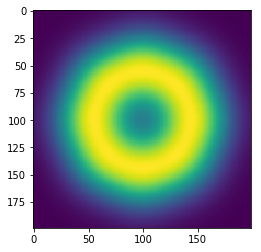

10.073869687462503


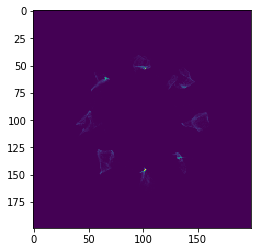

9.014487543123732


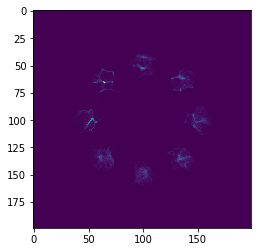

In [57]:
test='gmm'
#it does take a long time for gmm
if test=='gmm':
    range_limit=np.arange(-1,1,0.01)
else:
    range_limit=np.arange(-5,5,0.02)


if test=='pot1_hard':
    h=get_hist2d_form(pot1_hard,range_limit).T
    plt.imshow(h)
    plt.show()
    data=np.load('pot1_hard.npy')
    kl1,kl2=cal_KL(pot1_hard,data,range_limit)
    print((kl1+kl2)/2)
    h=get_hist2d(data,range_limit).T
    plt.imshow(h)
    plt.show()
    data=np.load('pot1_hard_EN.npy')
    kl1,kl2=cal_KL(pot1_hard,data,range_limit)
    print((kl1+kl2)/2)
    h=get_hist2d(data,range_limit).T
    plt.imshow(h)
    plt.show()
elif test=='pot2':
    h=get_hist2d_form(pot2,range_limit).T
    plt.imshow(h)
    plt.show()
    data=np.load('pot2.npy')
    kl1,kl2=cal_KL(pot2,data,range_limit)
    print((kl1+kl2)/2)
    h=get_hist2d(data,range_limit).T
    plt.imshow(h)
    plt.show()
    data=np.load('pot2_EN.npy')
    kl1,kl2=cal_KL(pot2,data,range_limit)
    print((kl1+kl2)/2)
    h=get_hist2d(data,range_limit).T
    plt.imshow(h)
    plt.show()
elif test=='gmm':
    h=get_hist2d_form(gmm,range_limit).T
    plt.imshow(h)
    plt.show()
    data=np.load('gmm.npy')
    kl1,kl2=cal_KL(gmm,data,range_limit)
    print((kl1+kl2)/2)
    h=get_hist2d(data,range_limit).T
    plt.imshow(h)
    plt.show()
    data=np.load('gmm_EN.npy')
    kl1,kl2=cal_KL(gmm,data,range_limit)
    print((kl1+kl2)/2)
    h=get_hist2d(data,range_limit).T
    plt.imshow(h)
    plt.show()